## Analysis


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.ticker import MultipleLocator
import warnings
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go
import os
import nbformat
# ve
import plotly.graph_objects as go
import plotly.io as pio
#show all the columns on output
pd.set_option('display.max.columns',999)

In [2]:
df_2022 = pd.read_csv('./cleaned_data/Police_Serviced_911_Calls_cleaned_2022.csv')
df_2023 = pd.read_csv('./cleaned_data/Police_Serviced_911_Calls_cleaned_2023.csv')
df_2024 = pd.read_csv('./cleaned_data/Police_Serviced_911_Calls_cleaned_2024.csv')


In [3]:
df_2022.drop('Unnamed: 0', axis=1, inplace=True)
df_2023.drop('Unnamed: 0', axis=1, inplace=True)
df_2024.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
combined_df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)


In [5]:
combined_df.head()

,incident_id,incident_location,call_source,call_description,category,priority,call_group,call_code,called_at,intake_time,dispatch_time,travel_time,on_scene_time,total_response_time,total_time,zip_code,precinct,scout_car_area,neighborhood_name,council_district,longitude,latitude,ESRI_OID,incident_entry_id
0,202200100010,King St & Oakland St,W911,MALICIOUS DESTRUCTION I/P,MDPIP,3,3PCT,381030,2022-01-01 05:04:20+00:00,0.8,55.2,8.5,75.8,65.2,140.9,48211,3.0,302,North End,5.0,-83.071164,42.383712,811061,NaN
1,202200100021,Holcomb St & E Jefferson Ave,W911,SHOTS FIRED IP,SHOTS IP,1,7PCT,342010,2022-01-01 05:06:56+00:00,0.7,28.3,8.7,5.3,37.7,43.0,48214,7.0,711,Gold Coast,5.0,-82.986218,42.357555,811060,NaN
2,202200100030,Strathmoor St & Midland St,E911,DISTURBANCE,DISTURB,3,2PCT,825030,2022-01-01 05:10:27+00:00,1.9,80.2,5.4,4.9,88.5,93.4,48227,2.0,201,Bethune Community,1.0,-83.187937,42.405480,811059,NaN
3,202200100033,Keeler St & Warwick St,PHONE,SHOTS FIRED IP,SHOTS IP,1,8PCT,342010,2022-01-01 05:10:53+00:00,0.8,4.3,3.5,137.8,12.6,150.4,48223,8.0,811,Rosedale Park,1.0,-83.228968,42.402660,811058,NaN
4,202200100048,Ilene St & Pickford St,W911,MISCELLANEOUS TRAFFIC,MISCTRAF,3,12PCT,817036,2022-01-01 05:14:42+00:00,1.5,211.1,2.2,4.3,215.4,219.7,48221,12.0,1207,Schulze,2.0,-83.162949,42.425949,811057,NaN


In [6]:
combined_df = combined_df.drop('incident_entry_id', axis=1)

In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941352 entries, 0 to 941351
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   incident_id          941352 non-null  int64  
 1   incident_location    941352 non-null  object 
 2   call_source          941352 non-null  object 
 3   call_description     941352 non-null  object 
 4   category             941352 non-null  object 
 5   priority             941352 non-null  object 
 6   call_group           941352 non-null  object 
 7   call_code            941352 non-null  object 
 8   called_at            941352 non-null  object 
 9   intake_time          941352 non-null  float64
 10  dispatch_time        941352 non-null  float64
 11  travel_time          941351 non-null  float64
 12  on_scene_time        941324 non-null  float64
 13  total_response_time  941352 non-null  float64
 14  total_time           941324 non-null  float64
 15  zip_code         

In [8]:
df_2024['called_at'] = pd.to_datetime(df_2024['called_at'])
df_2023['called_at'] = pd.to_datetime(df_2023['called_at'])
df_2022['called_at'] = pd.to_datetime(df_2022['called_at'])
combined_df['called_at'] = pd.to_datetime(combined_df['called_at'])

In [9]:
combined_df['year'] = combined_df['called_at'].dt.year
combined_df['month'] = combined_df['called_at'].dt.month


In [10]:
df_2024['month'] = df_2024['called_at'].dt.strftime("%b")
df_2023['month'] = df_2023['called_at'].dt.strftime("%b")
df_2022['month'] = df_2022['called_at'].dt.strftime("%b")
combined_df['month'] = combined_df['called_at'].dt.strftime("%b")


In [11]:
combined_df.head()

,incident_id,incident_location,call_source,call_description,category,priority,call_group,call_code,called_at,intake_time,dispatch_time,travel_time,on_scene_time,total_response_time,total_time,zip_code,precinct,scout_car_area,neighborhood_name,council_district,longitude,latitude,ESRI_OID,year,month
0,202200100010,King St & Oakland St,W911,MALICIOUS DESTRUCTION I/P,MDPIP,3,3PCT,381030,2022-01-01 05:04:20+00:00,0.8,55.2,8.5,75.8,65.2,140.9,48211,3.0,302,North End,5.0,-83.071164,42.383712,811061,2022,Jan
1,202200100021,Holcomb St & E Jefferson Ave,W911,SHOTS FIRED IP,SHOTS IP,1,7PCT,342010,2022-01-01 05:06:56+00:00,0.7,28.3,8.7,5.3,37.7,43.0,48214,7.0,711,Gold Coast,5.0,-82.986218,42.357555,811060,2022,Jan
2,202200100030,Strathmoor St & Midland St,E911,DISTURBANCE,DISTURB,3,2PCT,825030,2022-01-01 05:10:27+00:00,1.9,80.2,5.4,4.9,88.5,93.4,48227,2.0,201,Bethune Community,1.0,-83.187937,42.405480,811059,2022,Jan
3,202200100033,Keeler St & Warwick St,PHONE,SHOTS FIRED IP,SHOTS IP,1,8PCT,342010,2022-01-01 05:10:53+00:00,0.8,4.3,3.5,137.8,12.6,150.4,48223,8.0,811,Rosedale Park,1.0,-83.228968,42.402660,811058,2022,Jan
4,202200100048,Ilene St & Pickford St,W911,MISCELLANEOUS TRAFFIC,MISCTRAF,3,12PCT,817036,2022-01-01 05:14:42+00:00,1.5,211.1,2.2,4.3,215.4,219.7,48221,12.0,1207,Schulze,2.0,-83.162949,42.425949,811057,2022,Jan


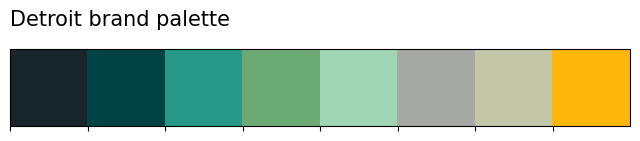

In [12]:
#### Call volume
sns.palplot(['#18252A','#004445', '#279989', '#6BAA75','#9FD5B3','#A7AAA4','#C2C6A7','#feb70d'])

plt.title("Detroit brand palette ",loc='left',fontfamily='sans-serif',fontsize=15,y=1.2)
plt.show()

 A line chart or area chart showing the number of incidents over time (e.g., by day, week, month).

In [13]:

x_a= df_2024['month'].unique()



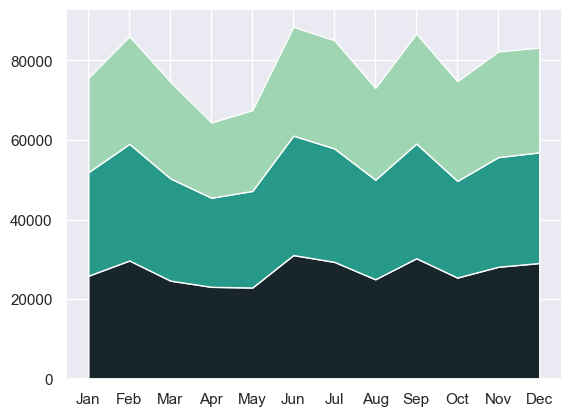

In [14]:
sns.set_theme(style = 'darkgrid')
fig, ax = plt.subplots()

calls_2024= df_2024.groupby('month')['incident_id'].count()
calls_2022 = df_2022.groupby('month')['incident_id'].count()
calls_2023 = df_2023.groupby('month')['incident_id'].count()

#ax.plot(x,y)
ax.stackplot(x_a,
             calls_2024,calls_2023,calls_2022,
             colors=['#18252A','#279989', '#9FD5B3']
             )



In [15]:

df_merge_three = [calls_2024, calls_2023, calls_2022]

import functools as ft
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='month',how='left'), df_merge_three)


In [16]:
df_final['incident_id'].mean()

np.float64(24764.5)

In [17]:
average = (df_final['incident_id_x'].mean() + df_final['incident_id_y'].mean()+ df_final['incident_id'].mean())/3

In [18]:
average

np.float64(26148.666666666668)

In [19]:

colors = {'2022':'rgba(159, 213, 179, 1)','2023':'rgba(39, 153, 137, 1)','2024':'rgba(24, 37, 42, 1)','Average':'rgba(254, 183, 13, 1)'}
fig = go.Figure()
fig.add_trace(go.Bar(name="2022", x=x_a, y=calls_2022,marker_color=colors['2022']))
fig.add_trace(go.Bar(name="2023", x=x_a, y=calls_2023,marker_color=colors['2023']))
fig.add_trace(go.Bar(name="2024", x=x_a, y=calls_2024,marker_color=colors['2024']))
fig.update_layout(
    title = dict(text = "Call Volume Per Month",
                 
                 font=dict(size=20, color="black")),
    xaxis_title="Month",
    yaxis_title="Number of calls", 
)
fig.add_shape(
    legendrank=1,
    name="Average",
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px",color=colors['Average']),
    label=dict(
        text="26148",
        textposition="start",
        font=dict(size=15, color="black"),
        yanchor="top"),
    x0=0.00,
    x1=1.0,
    y0=average,
    y1=average
)
fig.show()

####  heatmap showing incident frequency by hour.

In [20]:
df_new_2024 = df_2024.loc[df_2024['called_at']<'2025-01-01'].copy()

In [21]:
df_new_2024['hour_of_day'] = df_2024['called_at'].dt.hour

#hours_2024= df_2024.groupby('month')['incident_id'].count()

In [22]:

df_new_2024['Day_of_week'] = df_new_2024['called_at'].dt.strftime("%a")


In [23]:
df_new_2024

,incident_entry_id,incident_id,incident_location,call_source,call_description,category,priority,call_group,call_code,called_at,intake_time,dispatch_time,travel_time,on_scene_time,total_response_time,total_time,zip_code,precinct,scout_car_area,neighborhood_name,council_district,longitude,latitude,ESRI_OID,month,hour_of_day,Day_of_week
0,240010058,202400100058,Lappin St & Hoover St,W911,FELONIOUS ASSAULT IP,FA IP,1,9PCT,343010,2024-01-01 05:02:10+00:00,1.1,47.4,2.9,8.9,52.6,61.6,48205,9.0,901,Pulaski,3.0,-83.004767,42.436478,331888,Jan,5,Mon
1,240010063,202400100063,Eaton St & Cloverlawn St,W911,SHOTS FIRED IP,SHOTS IP,1,10PCT,342010,2024-01-01 05:02:24+00:00,0.6,67.8,3.4,9.5,73.3,82.8,48238,10.0,1001,Chalfonte,2.0,-83.152276,42.398040,331886,Jan,5,Mon
2,240010065,202400100065,E Lafayette St & Beaubien St,E911,DISTURBANCE,DISTURB,1,3PCT,GL8777,2024-01-01 05:02:30+00:00,1.3,-0.1,0.0,21.8,2.2,24.0,48226,3.0,312,Greektown,5.0,-83.042000,42.334006,331884,Jan,5,Mon
3,240010083,202400100083,Clarita St & Glenhurst St,W911,UNKNOWN PROBLEM,UNKPROB,2,8PCT,843020,2024-01-01 05:03:31+00:00,1.3,914.4,3.6,2.8,920.0,922.8,48219,8.0,805,Seven Mile-Rouge,1.0,-83.270550,42.427187,331882,Jan,5,Mon
4,240010084,202400100084,Petoskey Ave & Midland St,W911,SHOTS FIRED IP,SHOTS IP,1,12PCT,342010,2024-01-01 05:03:38+00:00,0.9,27.0,3.9,17.0,32.4,49.4,48238,12.0,1212,Pilgrim Village,2.0,-83.139391,42.406320,331880,Jan,5,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324358,243663887,202436603887,Ewald Cir & Fullerton St,W911,UNKNOWN PROBLEM,UNKPROB,2,10PCT,843020,2024-12-31 23:52:28+00:00,1.1,5.4,5.7,3.7,12.8,16.5,48238,10.0,1002,Oakman Blvd Community,7.0,-83.145182,42.381070,7152,Dec,23,Tue
324359,243663894,202436603894,Devonshire Rd & Bremen St,W911,VERIFIED ALR / PERSON W/O CODE,VERALRM,2,5PCT,805020,2024-12-31 23:54:21+00:00,1.3,16.4,7.5,15.5,37.7,53.1,48224,5.0,506,Morningside,4.0,-82.937617,42.395078,7150,Dec,23,Tue
324360,243663899,202436603899,Grand River Ave & Mettetal St,W911,UNKNOWN PROBLEM,UNKPROB,2,8PCT,843020,2024-12-31 23:55:40+00:00,0.8,35.2,12.0,32.0,48.2,80.1,48227,8.0,814,Grand River-St Marys,1.0,-83.207222,42.396238,7148,Dec,23,Tue
324361,243663904,202436603904,Conant St & E Nevada St,PHONE,DISTURBANCE,DISTURB,3,11PCT,825030,2024-12-31 23:57:11+00:00,1.0,0.6,0.5,10.0,2.1,12.0,48212,11.0,1107,Conant Gardens,3.0,-83.068618,42.425842,7146,Dec,23,Tue


In [24]:
#calls_2024= df_2024.groupby('hour_of_day','Day_of_week')['incident_id'].count()
data_hours_day= pd.pivot_table(df_new_2024, values='incident_entry_id', index='Day_of_week', columns='hour_of_day',aggfunc='count')

days = [	'Mon',	'Tue',	'Wed', 'Thu', 'Fri', 'Sat',	'Sun']

In [25]:
data_busy  = data_hours_day.reindex(days)

Text(0.5, 1.0, 'Total Incident By Hour')

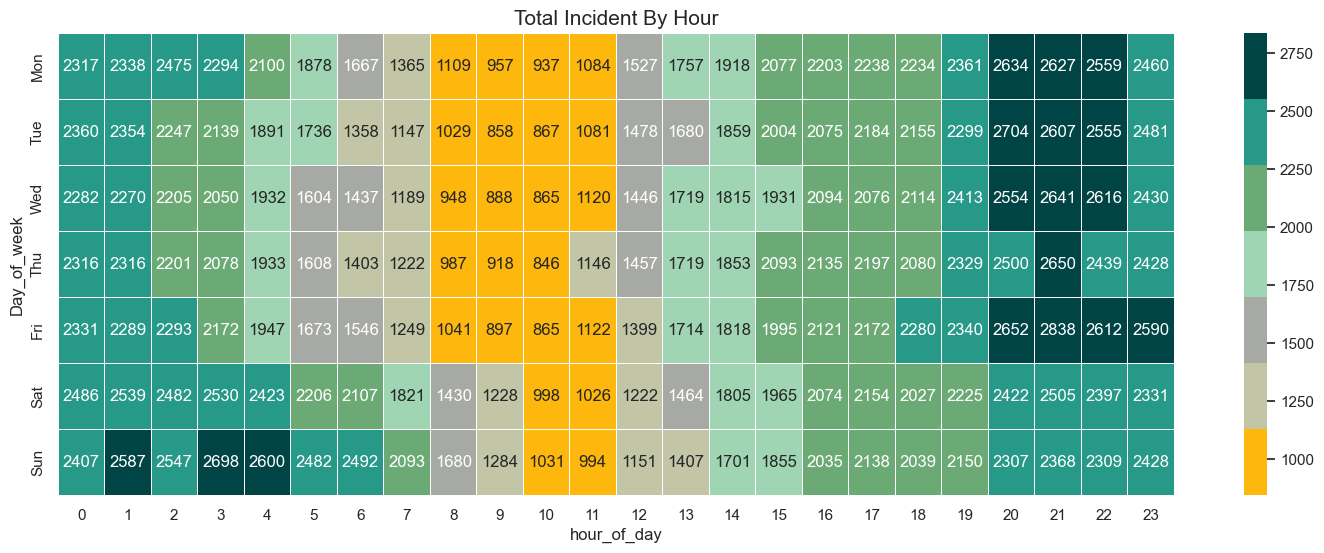

In [26]:
f, ax = plt.subplots(figsize=(18, 6))
custom_pallette = ['#004445', '#279989', '#6BAA75','#9FD5B3','#A7AAA4','#C2C6A7','#feb70d']
sns.heatmap(data_busy, annot=True, fmt="d", linewidths=.5, ax=ax,cmap=custom_pallette[::-1])
ax.set_title("Total Incident By Hour",
             fontdict = {'fontsize':15})

#### A line chart showing average response times (total_response_time) by hour of the day.

In [27]:
df_new_2024.head()

,incident_entry_id,incident_id,incident_location,call_source,call_description,category,priority,call_group,call_code,called_at,intake_time,dispatch_time,travel_time,on_scene_time,total_response_time,total_time,zip_code,precinct,scout_car_area,neighborhood_name,council_district,longitude,latitude,ESRI_OID,month,hour_of_day,Day_of_week
0,240010058,202400100058,Lappin St & Hoover St,W911,FELONIOUS ASSAULT IP,FA IP,1,9PCT,343010,2024-01-01 05:02:10+00:00,1.1,47.4,2.9,8.9,52.6,61.6,48205,9.0,901,Pulaski,3.0,-83.004767,42.436478,331888,Jan,5,Mon
1,240010063,202400100063,Eaton St & Cloverlawn St,W911,SHOTS FIRED IP,SHOTS IP,1,10PCT,342010,2024-01-01 05:02:24+00:00,0.6,67.8,3.4,9.5,73.3,82.8,48238,10.0,1001,Chalfonte,2.0,-83.152276,42.398040,331886,Jan,5,Mon
2,240010065,202400100065,E Lafayette St & Beaubien St,E911,DISTURBANCE,DISTURB,1,3PCT,GL8777,2024-01-01 05:02:30+00:00,1.3,-0.1,0.0,21.8,2.2,24.0,48226,3.0,312,Greektown,5.0,-83.042000,42.334006,331884,Jan,5,Mon
3,240010083,202400100083,Clarita St & Glenhurst St,W911,UNKNOWN PROBLEM,UNKPROB,2,8PCT,843020,2024-01-01 05:03:31+00:00,1.3,914.4,3.6,2.8,920.0,922.8,48219,8.0,805,Seven Mile-Rouge,1.0,-83.270550,42.427187,331882,Jan,5,Mon
4,240010084,202400100084,Petoskey Ave & Midland St,W911,SHOTS FIRED IP,SHOTS IP,1,12PCT,342010,2024-01-01 05:03:38+00:00,0.9,27.0,3.9,17.0,32.4,49.4,48238,12.0,1212,Pilgrim Village,2.0,-83.139391,42.406320,331880,Jan,5,Mon


In [28]:
data_total_response= pd.pivot_table(df_new_2024, values='total_response_time', index='hour_of_day', columns='Day_of_week',aggfunc='mean')



In [29]:
df_response = data_total_response.reindex(columns=days)

In [30]:
df_response

Day_of_week,Mon,Tue,Wed,Thu,Fri,Sat,Sun
hour_of_day,,,,,,,
0,45.323220,39.562627,38.362621,41.913083,40.432089,41.611102,46.149564
1,47.163259,42.009516,39.285286,38.502288,46.334688,44.305908,52.628759
2,51.864202,44.919804,42.203265,45.122172,47.896642,48.455197,57.102513
3,53.568047,44.286583,41.751415,41.181328,46.053913,45.508854,56.116160
4,43.037095,36.966208,37.003468,35.626384,42.514022,40.120429,51.219154
5,46.190043,30.466014,31.663155,33.782027,38.823670,40.304624,46.625383
6,42.828374,32.074300,30.238900,32.949822,35.649030,40.191030,49.766332
7,47.650037,28.009677,28.264003,30.382815,33.313691,41.181219,50.659532
8,46.329486,27.574052,29.493249,27.494630,34.819693,39.286993,48.113631


Text(0.5, 1.0, 'Average Response Times By Hour Of The Day')

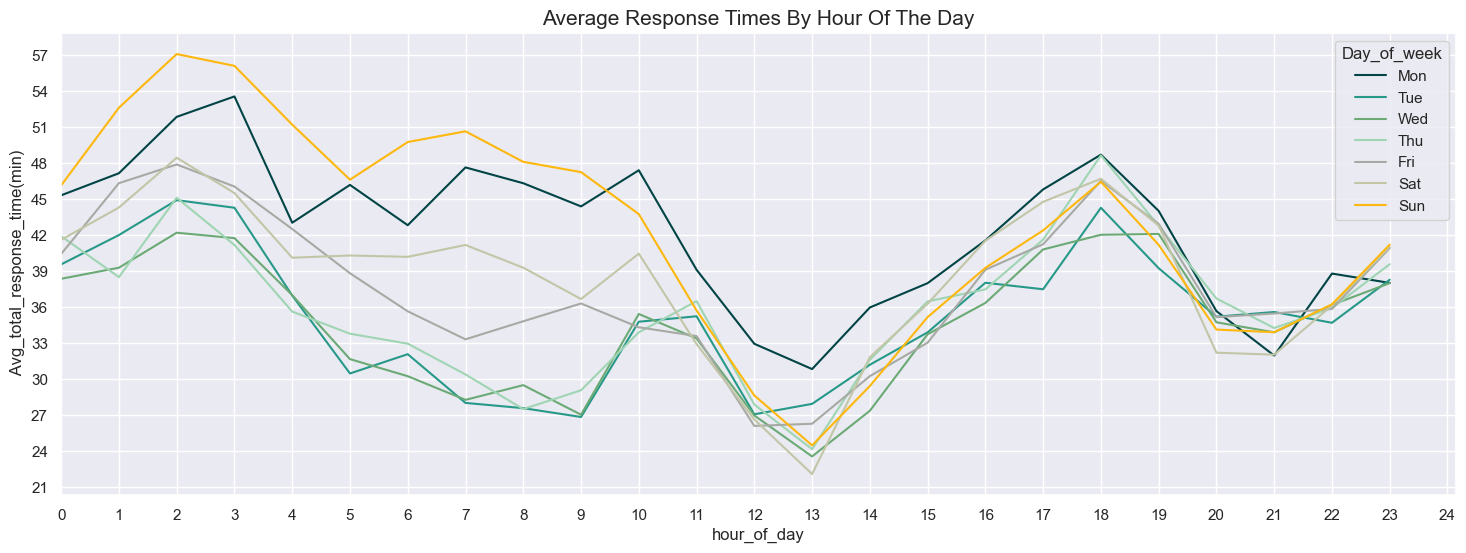

In [31]:
f, ax = plt.subplots(figsize=(18, 6))
custom_pallette = ['#004445', '#279989', '#6BAA75','#9FD5B3','#A7AAA4','#C2C6A7','#feb70d',]
sns.lineplot(df_response,  ax=ax, palette=custom_pallette,dashes= False)
plt.xlim(0)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(3))
ax.set_ylabel(" Avg_total_response_time(min)")
ax.set_title("Average Response Times By Hour Of The Day",
             fontdict = {'fontsize':15})

#####  the proportion of incidents by category (e.g., fire, medical, police).

In [33]:
data_catagory = df_new_2024['category'].value_counts()


In [34]:
data_catagory = pd.DataFrame(data_catagory).reset_index()
data_catagory.columns = ['category', 'count']

In [35]:
data_catagory.head(25)

,category,count
0,DISTURB,67373
1,UNKPROB,31567
2,FA IP,18221
3,AB IP/JH,14138
4,DV A/B,13486
5,INVPERS,11491
6,ACCUNK,10725
7,HI1 I/P,6740
8,LARCENY,6630
9,WBC,6076


In [36]:
df_new_2024['category'].nunique()

181

In [37]:
group = df_new_2024.groupby('category')

df2 = group.apply(lambda x: x['call_description'].unique())

C:\Users\manup\AppData\Local\Temp\ipykernel_21268\3213572284.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [38]:
with pd.option_context('display.max_rows', 1000,):
    print(df2)

category
988OTHR                                    [988-SUICIDE INFO]
988SUI                                      [988-SUICIDE I/P]
AB                                      [ASSAULT AND BATTERY]
AB IP/JH                          [ASSAULT AND BATTERY IP-JH]
ABRPT                            [ASSAULT AND BATTERY REPORT]
ABUSE                                  [CHILD /  ADULT ABUSE]
ABUSERPT                         [CHILD / ADULT ABUSE REPORT]
ACCINJ      [AUTO X - BLDG / DWELL, AUTO X OR PED X - INJU...
ACCREPT                                       [AUTO X REPORT]
ACCUNK                            [AUTO X UNK INJ / IMPAIRED]
ACTVSHTR                         [ACTIVE SHOOTER/MASS ATTACK]
AIDMOTOR    [AID MOTORIST CHILD LOCKED INSD, AID MOTORIST ...
AIDMOTR                                   [AID MOTORIST MISC]
ALRMALF                                   [ALARM MALFUNCTION]
ALRUNK                                  [ALARM UNKNOWN CAUSE]
ANMLCOMP                                   [ANIMAL COMPLAINT]

In [52]:
fig = px.bar(data_catagory.nlargest(20,'count'), x='category', y='count',title='<b>The Proportion Of Incidents By Category</b>')
fig.update_traces(marker_color="#279989")
fig.update_layout( title_x=0.5,
                  autosize=False,
                  width=800,
                  height=600)
fig.show()